#### SIPP1991 401K data

#### logs

5/15/2024 WL: template provided. TODO: write a brief intro to the data discussing the background, and the meaning of the variables; do a bit data summary and regression along the similar lines of ldw data.


**Data source: SIPP 1991 (Abadie, 2003), pages 231-263**
  
This paper investigates the effect of 401(k) programs on savings. To combat selection bias, they use a new statistical method that accounts for individual differences in benefit from 401(k), works with continuous outcomes (like amount saved) and avoids strong assumptions on variable relationships.   

The variables in the data set include:
\begin{align*}
%\begin{array}{ll}
\hline \text { Variable } & \quad \text { Description } \\
\hline \text { net tfa } &\quad  \text { Net total financial assets } \\
\text { e401 } &\quad  \text { = 1 if employers offers 401(k) } \\
\text { p401 } &\quad  \text { = 1 if the employee participates 401(k) } \\
\text { age } & \quad \text { age } \\
\text { inc } &\quad  \text { income } \\
\text { fsize } &\quad  \text { family size } \\
\text { educ } &\quad  \text { years of education }\\
\text { db } &\quad  \text { = 1 if indivudual has defined benefit pension } \\
\text { marr } &\quad \text { = 1 if married } \\
\text { twoearn } &\quad \text { = 1 if two-earner household } \\
\text { pira } &\quad \text { = 1 if individual participates in IRA } \\
\text { hown } &\quad \text { = 1 if home owner } \\
\hline
%\end{array}
\end{align*}

The data consist of 9915 observations from the Survey of Income and Program Participation (SIPP) of 1991. It is restricted to households of persons aged 25-64, where at least one individual is employed and no persns are self-employed. Additionally, family income ranges beteen $10,000 - $200,000.

In [38]:
import io
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import requests
from data_process import load_rdata

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: c:\Users\I1000928\Projects\Causal-Inference-Data-Analyses\401K


In [33]:
sns.set()
colors = sns.color_palette()
plt.rcParams['figure.figsize'] = 7., 5
sns.set(font_scale=1)
sns.set_style('whitegrid', {'axes.spines.top': True,
                            'axes.spines.bottom': True,
                            'axes.spines.left': True,
                            'axes.spines.right': True})

In [28]:
fin_data = load_rdata(r"C:\Users\I1000928\Projects\Causal-Inference-Data-Analyses\401K\data\sipp1991.Rdata")
df = list(fin_data.values())[0]
df.describe()

,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown
count,9.915000e+03,9.915000e+03,9.915000e+03,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000
mean,1.392864e+04,1.805153e+04,6.381685e+04,41.060212,37200.623197,2.865860,13.206253,0.271004,0.604841,0.380837,0.371357,0.261624,0.242158,0.635199
std,5.490488e+04,6.352250e+04,1.115297e+05,10.344505,24774.288006,1.538937,2.810382,0.444500,0.488909,0.485617,0.483192,0.439541,0.428411,0.481399
min,0.000000e+00,-5.023020e+05,-5.023020e+05,25.000000,-2652.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+02,-5.000000e+02,3.291500e+03,32.000000,19413.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.635000e+03,1.499000e+03,2.510000e+04,40.000000,31476.000000,3.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.765500e+03,1.652450e+04,8.148750e+04,48.000000,48583.500000,4.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.430298e+06,1.536798e+06,2.029910e+06,64.000000,242124.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Key distributional facts
print(f"Sample size: {len(df)}")
print(f"People with zero net_tfa: {sum(df['net_tfa'] == 0)} ({sum(df['net_tfa'] == 0)/len(df)*100:.1f}%)")
print(f"401k participation rate: {df['p401'].mean()*100:.1f}%")
print(f"Employer offering rate: {df['e401'].mean()*100:.1f}%")

Sample size: 9915
People with zero net_tfa: 783 (7.9%)
401k participation rate: 26.2%
Employer offering rate: 37.1%


In [38]:
# Cross-tabulation of e401 and p401
cross_tab = pd.crosstab(df['e401'], df['p401'], margins=True, margins_name='Total', normalize='index')
cross_tab.head()
print(cross_tab)


p401          0         1
e401                     
0      1.000000  0.000000
1      0.295492  0.704508
Total  0.738376  0.261624


The cross-tabulation shows the relationship between whether an employer offers a 401(k) plan (`e401`) and whether the employee participates in a 401(k) plan (`p401`).

- When employer does not offer 401(k) (`e401` is 0), 100% of employees do not participate (`p401` = 0).
- When employer offers 401(k) (`e401` is 1), about 70.5% of employees participate (`p401` = 1) and 29.5% do not.
- In total about 26.2% participate in a 401(k), and 73.8% do not.

While it is evident that employees can only participate in a 401(k) if their employer offers one; even when offered, not all employees choose to participate.

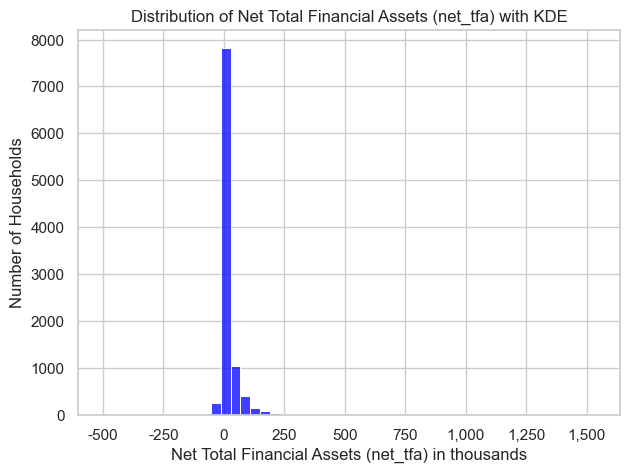

In [ ]:
# Distribution of avg net_tfa
sns.histplot(data=df, x=df['net_tfa']/1000, bins=50, kde=False, color='blue')
plt.title("Distribution of Net Total Financial Assets (net_tfa) with KDE")
plt.xlabel("Net Total Financial Assets (net_tfa) in thousands")
plt.ylabel("Number of Households")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # No scientific notation, comma as thousands separator
plt.show()

##### It looks like the distribution is skewed to the left by households with 0 net total financial assets. Let's examine the differences in net_tfa by 401k status.

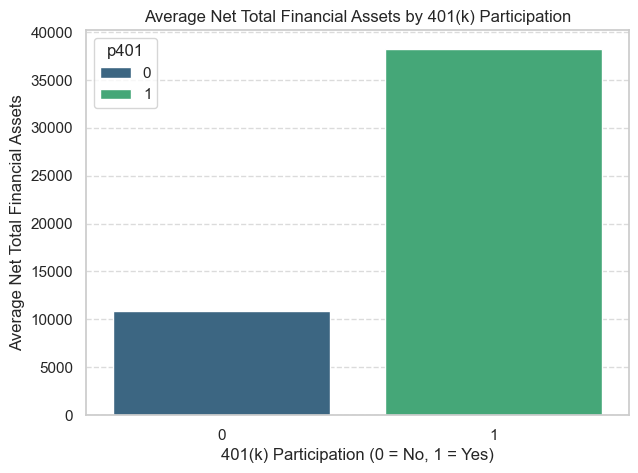

In [ ]:
# differences in net_tfa by 401k status
avg_net_tfa = df.groupby('p401')['net_tfa'].mean().reset_index()
sns.barplot(x='p401', y='net_tfa', data=avg_net_tfa, palette='viridis', hue = 'p401')
plt.title('Average Net Total Financial Assets by 401(k) Participation')
plt.xlabel('401(k) Participation (0 = No, 1 = Yes)')
plt.ylabel('Average Net Total Financial Assets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### something something p401 = 1 = >net_tfa. Why? let's look at income and age distributions by treatment status or use our regression to determine which coefficiencts r most relevant.

In [44]:
#Ignore for now. Hold over from previous analysis
import statsmodels.api as sm

X = df[["e401", "age", "inc", "educ", "fsize", "db", "marr", "twoearn", "pira", "hown"]]
X = sm.add_constant(X)  # adds intercept
y = df["net_tfa"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                net_tfa   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     297.8
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:39:33   Log-Likelihood:            -1.2242e+05
No. Observations:                9915   AIC:                         2.449e+05
Df Residuals:                    9904   BIC:                         2.449e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.291e+04   4276.223     -7.695      0.0